# Programming for Data Analysis Assignment

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.

Specifically, in this project you should:

• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 

## Initial Research
 > 02/11/2023: After group call to discuss project, I looked at [Kaggle](https://www.kaggle.com/datasets?search=Timeseries), [Tableau](https://www.tableau.com/learn/articles/free-public-data-sets), [Open Data](data.gov.ie) and [Gretel AI](Gretel.ai) 
 >
 > 03/11/2023: Revisited [OpenData](data.gov.ie) as it is open source Irish data from the Central Statisitcs Office webpage with a wide variety of datasets. Three tables in particular found here - 
 >
 > Table 1: https://data.cso.ie/table/AKM01 - **AKM01 Intake of Cows Milk by Creameries and Pasteurisers**
 >
 > Table 2: https://data.cso.ie/table/MTM01 - **MTM01 Rainfall**
 >
 > Table 3: https://data.cso.ie/table/MTM02 - **MTM02 Temperature**
 >
 > I was intrigued to look at any correlation between milk fat content (%) or protein content (%) and Irish weather as Irish dairy is one of our major exports, with "€6.8bn worth of Irish dairy exported worldwide in 2022" (Freiburg, 2022). I was interested to see if the correlation is visible from historical data, could I model future fat and protein content based on climate change predictions. 
 >
 > According to Linn (1988), in the American dairy sector "seasonal variations in milk fat percentages are well recognized, with summer months averaging 0.4 percentage units less than winter months". Aidan Brennan, in an article on The Farmer's Journal in May 2021, described torrential rain in Ireland at that time as resulting "in a big drop in milk yield".   
 >
 > The *Rainfall* and *Temperature* datasets start in January 1958 and runs up to December 2022 and contains three measurements - *total rainfall(mm), most rainfall in a day(mm), and raindays (0.2mm or more)* and five measurements - *average maximum temperature, average minimum temperature, highest temperature, lowest temperature and mean temperature (all in degrees celsius)*. The measurements are taken across 15 meteorological weather stations in Ireland (Belmullet, Bitt, Casement, Claremorris, Clones, Cork Airport, Dublin Airport, Galway, Kilkenny, Malin Head, Mullingar, Roches Point, Rosslare, Shannon Airport and Valentia Observatory). I intend to calculate a national monthly average from these measurements. The date format is in YYYYM01-YYYYM12. 
 >
 > The *Intake of Cows Milk by Creameries and Pasteurisers* dataset starts in January 1980 (it actually starts in the file at January 1975 however there is no data values prior to the January 1980). The data runs up to September 2023. There are three measurements - *intake of cows milk by creameries and pasteurisers (millions of litres), fat content (%) and protein content (%)*. I intend to focus purely on fat content and protein content as the climate could impact both measurements and while intake could be impacted by climate, it could equally be impacted by economic factors (demand and pricing).
 >
 > The date format for *Intake of Cows Milk by Creameries and Pasteurisers* is YYYY January - YYYY December. I will have the raw files saved as *irishmilkproduction.csv* , *irishrainfall.csv* and *irishtemperature.csv* and then amend the date format of all files to MM-YYYY to use as the column to merge the files on and create one csv file to use for the Pandas DataFrame.
 >
 > ![Dairy Cattle in Ireland](https://img.rasset.ie/0018ad48-800.jpg)
 _________

## Referencing
> **Referencing for this project is in Harvard Referencing Style based on the guidance found in ATU's [Academic Integrity Notes](https://atlantictu.libguides.com/academicintegrity/referencing)**
> ### Academic References
>Freiberg, R. (2022). Irish dairy worth €6.8bn shipped to 133 markets in 2022. AgriLand. Retrieved from: https://www.agriland.ie/farming-news/irish-dairy-worth-e6-8bn-shipped-to-133-markets-in-2022/
>
>IBEC. (n.d.). Economics and Social - Dairy Industry Ireland. [online] Available at: https://www.ibec.ie/dairyindustryireland/our-dairy-story/economics-and-social [Accessed 3 Nov. 2023].
>
>safefood.net. (2017). Climate Change on the Dairy Production Report. [PDF] Available at: https://www.safefood.net/getmedia/c22bbc41-71de-4801-81b5-5b95a3520cbb/M10039-SAFEFOOD_Climate-Change-on-the-Dairy-Production-Report-24-02-2017.aspx?ext=.pdf [Accessed 9 Nov. 2023].
>
>Irish Examiner. (n.d.). ‘The Irish grass-fed dairy sector is the envy of the world’ written by Aisling Kiernan. [online] Available at: https://www.irishexaminer.com/farming/arid-40715306.html [Accessed 11 Nov. 2023].
>
>National Dairy Council. (n.d.). Irish Dairy – Part of Ireland’s Sustainable Future. [Blog] Available at: https://ndc.ie/blog/irish-dairy-part-of-irelands-sustainable-future/ [Accessed 11 Nov. 2023]. Written by Zoë Kavanagh, CEO, National Dairy Council.
>
>Brennan, A. (2021, May 24). Dairy Management: Dealing with the Aftermath of Torrential Rain. The Farmer's Journal. Retrieved from: https://www.farmersjournal.ie/dairy/management/dairy-management-dealing-with-the-aftermath-of-torrential-rain-623405
>
>Kavanagh, S. (n.d.). Feeding The Dairy Cow. Teagasc. Retrieved from: https://www.teagasc.ie/media/website/animals/dairy/FeedingDiaryCow.pdf.
>
>Halleron, R. (2018). Munster is the real epicentre of the Irish dairy industry: Here’s the proof… Agriland.ie Retrieved from https://www.agriland.ie/farming-news/munster-is-the-real-epicentre-of-the-irish-dairy-industry-heres-the-proof/
>
> - Met Éireann. (n.d.). Climate Change. [online] Available at: https://www.met.ie/climate/climate-change [Accessed 13 Nov. 2023].
________
> ### Technical References
>
>IBM. (n.d.). Markdown and HTML quick reference. Retrieved from: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet.
>
>Pandas. (n.d.). Merging, Joining, and Concatenating. Retrieved from: https://pandas.pydata.org/docs/dev/user_guide/merging.html.
>
>GeeksforGeeks. (n.d.). Replace NaN values with zeros in Pandas DataFrame. Retrieved from: https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/.
>
>Wei, S. (2023). 3 Convenient Methods to Plot a Horizontal or Vertical Line with Matplotlib. [online] Available at: https://medium.com/@shouke.wei/3-convenient-methods-to-plot-a-horizontal-or-vertical-line-with-matplotlib-b8fbdf77f7a5 [Accessed 18 Nov. 2023]. Published on 25th June 2023

In [1]:
# Library Imports
import pandas as pd

# Read CSV files to create DataFrames
df_milk = pd.read_csv('files/irishmilkproduction.csv')
df_rain = pd.read_csv('files/irishrainfall.csv')
df_temp = pd.read_csv('files/irishtemperature.csv')

# Print .head and .tail of each respective DataFrame to check that CSV files have been read successfully
print(df_milk.head, df_milk.tail)

print(df_rain.head, df_rain.tail)

print(df_temp.head, df_temp.tail)

<bound method NDFrame.head of                                         Statistic Label           Month  \
0     Intake of Cows Milk by Creameries and Pasteuri...    1975 January   
1     Intake of Cows Milk by Creameries and Pasteuri...    1975 January   
2     Intake of Cows Milk by Creameries and Pasteuri...   1975 February   
3     Intake of Cows Milk by Creameries and Pasteuri...   1975 February   
4     Intake of Cows Milk by Creameries and Pasteuri...      1975 March   
...                                                 ...             ...   
3505                                    Protein Content       2023 July   
3506                                    Protein Content     2023 August   
3507                                    Protein Content     2023 August   
3508                                    Protein Content  2023 September   
3509                                    Protein Content  2023 September   

     Domestic or Import Source            UNIT   VALUE  
0           

#### Note:
Initial output of file shows that the VALUE column of the df_milk data of the contains NaN returns (Not A Number) and this is due to the fact that all the rows relating to milk production and volume imported is all empty. This is something that will be resolved by the data tidy up. I will be filtering the df_milk to return only domestically produced milk and just the rows where the 'statistic label' value is either 'Fat Content' or 'Protein Content'. 

From the df_rain, the NaN result will need to be changed to a 0.0 as these will be the months where no rain was recorded in that metereological station.

From the df_temp DataFrame, I will focus on the mean temperature however there are thousands of rows within the dataset with empty values for the temperature measurement so I will remove these also so as not to skew the national average mean. 

In [2]:
# Return subset of df_milk to only focus on fat and protein
df_milk_pf = df_milk.loc[df_milk.loc[:,'Statistic Label'].isin(['Protein Content', 'Fat Content'])]

# Only include rows where 'Domestic or Import Source' is equal to 'Domestic'
df_milk_pf = df_milk_pf[df_milk_pf['Domestic or Import Source'] == 'Domestic']

# Print to check if filtering has worked
print(df_milk_pf)

      Statistic Label           Month Domestic or Import Source UNIT  VALUE
1170      Fat Content    1975 January                  Domestic    %    NaN
1172      Fat Content   1975 February                  Domestic    %    NaN
1174      Fat Content      1975 March                  Domestic    %    NaN
1176      Fat Content      1975 April                  Domestic    %    NaN
1178      Fat Content        1975 May                  Domestic    %    NaN
...               ...             ...                       ...  ...    ...
3500  Protein Content        2023 May                  Domestic    %   3.40
3502  Protein Content       2023 June                  Domestic    %   3.39
3504  Protein Content       2023 July                  Domestic    %   3.47
3506  Protein Content     2023 August                  Domestic    %   3.62
3508  Protein Content  2023 September                  Domestic    %   3.77

[1170 rows x 5 columns]


In [3]:
# Replace NaN values from rain measurements with 0.0 to allow for calculating of averages. 
df_rain['VALUE'] = df_rain['VALUE'].fillna(0)

# Filter df_rain to only look at rows with statistic label of 'Total Rainfall'
df_rain_pf = df_rain.loc[df_rain.loc[:,'Statistic Label'] == 'Total Rainfall']

# Print df_rain_pf to check if filtering has worked
print(df_rain_pf)

      Statistic Label    Month Meteorological Weather Station         UNIT  \
0      Total Rainfall  1958M01                      Belmullet  Millimetres   
1      Total Rainfall  1958M01                           Birr  Millimetres   
2      Total Rainfall  1958M01           Valentia Observatory  Millimetres   
3      Total Rainfall  1958M01                       Casement  Millimetres   
4      Total Rainfall  1958M01                    Claremorris  Millimetres   
...               ...      ...                            ...          ...   
11695  Total Rainfall  2022M12                     Malin head  Millimetres   
11696  Total Rainfall  2022M12                      Mullingar  Millimetres   
11697  Total Rainfall  2022M12                   Roches Point  Millimetres   
11698  Total Rainfall  2022M12                       Rosslare  Millimetres   
11699  Total Rainfall  2022M12                Shannon airport  Millimetres   

       VALUE  
0      160.2  
1       95.6  
2      214.8  
3  

In [4]:
# Return subset of df_temp to only focus on mean temp
df_temp_mean = df_temp.loc[df_temp.loc[:,'Statistic Label'] == 'Mean Temperature']

# Print to check if filtering has worked
print(df_temp_mean)

        Statistic Label    Month Meteorological Weather Station       UNIT  \
23400  Mean Temperature  1958M01                      Belmullet  Degrees C   
23401  Mean Temperature  1958M01                           Birr  Degrees C   
23402  Mean Temperature  1958M01           Valentia Observatory  Degrees C   
23403  Mean Temperature  1958M01                       Casement  Degrees C   
23404  Mean Temperature  1958M01                    Claremorris  Degrees C   
...                 ...      ...                            ...        ...   
35095  Mean Temperature  2022M12                     Malin Head  Degrees C   
35096  Mean Temperature  2022M12                      Mullingar  Degrees C   
35097  Mean Temperature  2022M12                   Roches Point  Degrees C   
35098  Mean Temperature  2022M12                       Rosslare  Degrees C   
35099  Mean Temperature  2022M12                Shannon Airport  Degrees C   

       VALUE  
23400    5.9  
23401    5.0  
23402    7.1  
234

I will tidy up the date columns in each of the three filtered Datasets by utilising the [datetime library from Python](https://docs.python.org/3/library/datetime.html) and the [Pandas documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) for to_datetime. Once I have a common formatted date column, I will filter the three datasets to start at 01-1980, which is the earliest data for the milk content. 

In [5]:
# Library Imports
from datetime import datetime

# Converting the date format in the 'Month column and return to new column named 'New_Date'
df_rain_pf['New_Date'] = df_rain_pf['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
df_temp_mean['New_Date'] = df_temp_mean['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
df_milk_pf['New_Date'] = df_milk_pf['Month'].apply(lambda x: datetime.strptime(x, '%Y %B').strftime('%m-%Y'))

# Convert 'New_Date' column to datetime format as 'YYYY-MM'
df_rain_pf['New_Date'] = pd.to_datetime(df_rain_pf['New_Date'], format='%m-%Y').dt.to_period('M')
df_temp_mean['New_Date'] = pd.to_datetime(df_temp_mean['New_Date'], format='%m-%Y').dt.to_period('M')
df_milk_pf['New_Date'] = pd.to_datetime(df_milk_pf['New_Date'], format='%m-%Y').dt.to_period('M')

# Filter the DataFrames so that all of them start at the same date and adding .copy() to prevent errors
df_rain_pf = df_rain_pf[df_rain_pf['New_Date'] >= '01-1980'].copy()
df_temp_mean = df_temp_mean[df_temp_mean['New_Date'] >= '01-1980'].copy()
df_milk_pf = df_milk_pf[df_milk_pf['New_Date'] >= '01-1980'].copy()

# Print the first 5 rows of each DataFrame to check that they all start at the same date
print(df_rain_pf['New_Date'].head())
print(df_temp_mean['New_Date'].head())
print(df_milk_pf['New_Date'].head())

3960    1980-01
3961    1980-01
3962    1980-01
3963    1980-01
3964    1980-01
Name: New_Date, dtype: period[M]
27360    1980-01
27361    1980-01
27362    1980-01
27363    1980-01
27364    1980-01
Name: New_Date, dtype: period[M]
1290    1980-01
1292    1980-02
1294    1980-03
1296    1980-04
1298    1980-05
Name: New_Date, dtype: period[M]


C:\Users\pcallaghan\AppData\Local\Temp\ipykernel_14612\1648652606.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_pf['New_Date'] = df_rain_pf['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
C:\Users\pcallaghan\AppData\Local\Temp\ipykernel_14612\1648652606.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp_mean['New_Date'] = df_temp_mean['Month'].apply(lambda x: datetime.strptime(x, '%YM%m').strftime('%m-%Y'))
C:\Users\pcallaghan\AppData\Local\Temp\ipykernel_146

#### Note:
> ![Warning]("files/img/ValueTryingToBeSetOnCopyOfSliceFromDF.png")

Based on the warning I received from running the script above initially, I have studied the [recommended documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy) and appending .copy() as per the recommendation.

##### Next Steps:
Now that I have a common date format across the three DataFrames and they now all start at the same point in history, I will merge all three DataFrames into one by utlising the [Pandas Merge Function.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

Owing to the fact that the statistics from the CSO for milk production is nationally focused, I will calculate national mean rainfall and national mean temperature initially to see a national picture. I will fine tune the dataset to focus on statistics from the Munster region as that is where the greatest number of dairy cattle are found (Halleron, 2018).

I will also need to split the existing milk dataframe into two based on the statistic labels of 'Fat Content' and 'Protein Content'. This will facilitate a merged file where for each unique month value, I will have four quantitative variables of *FatContent%*, *ProteinContent*, *NationalMonthlyMeanRainfallMM* and *NationalMonthlyMeanTempDegreesC*. This will significantly reduce the size of the DataFrame (and speed up return time of calculations). 

 - First, calculate national monthly mean rainfall. 
 - Second, calculate national monthly mean temperature.
 - Third, split milk dataframe into two (based on statistic labels)
 - Fourth, merge data. 

#### First Step - The Rain 🌧️

In [6]:
# Calculate national monthly mean for df_rain_pf
national_monthly_mean_rain_pf = df_rain_pf.groupby('New_Date')['VALUE'].mean()
df_rain_pf['NationalMonthlyMeanRainfallMM'] = df_rain_pf['New_Date'].map(national_monthly_mean_rain_pf)

# New column headers and drop columns no longer needed
# Drop unnecessary columns
df_rain_pf = df_rain_pf.drop(['Statistic Label','Meteorological Weather Station', 'VALUE', 'UNIT', 'Month'], axis=1)

# Rename columns
df_rain_pf = df_rain_pf.rename(columns={'New_Date': 'Month'})

# Drop duplicate rows based on the 'Month' column
df_rain_pf = df_rain_pf.drop_duplicates(subset='Month')


#### Second Step - The Temperature ☀️

In [7]:
# Calculate national monthly mean for df_temp_mean
national_monthly_mean_temp_mean = df_temp_mean.groupby('New_Date')['VALUE'].mean()
df_temp_mean['NationalMonthlyMeanTempDegreesC'] = df_temp_mean['New_Date'].map(national_monthly_mean_temp_mean)

# New column headers and drop columns no longer needed
# Drop unnecessary columns
df_temp_mean = df_temp_mean.drop(['Statistic Label','Meteorological Weather Station', 'VALUE', 'UNIT', 'Month'], axis=1)

# Rename columns
df_temp_mean = df_temp_mean.rename(columns={'New_Date': 'Month'})

# Drop duplicate rows based on the 'Month' column
df_temp_mean  = df_temp_mean.drop_duplicates(subset='Month')

#### Third Step - The Milk 🥛

In [8]:
# Split df_rain to only look at rows with statistic label of 'Total Rainfall'
df_milk_fat = df_milk_pf.loc[df_milk_pf.loc[:,'Statistic Label'] == 'Fat Content']
df_milk_protein = df_milk_pf.loc[df_milk_pf.loc[:,'Statistic Label'] == 'Protein Content']

# New column headers and drop columns no longer needed
# Drop unnecessary columns
df_milk_fat = df_milk_fat.drop(['Statistic Label','Domestic or Import Source', 'UNIT', 'Month'], axis=1)
df_milk_protein = df_milk_protein.drop(['Statistic Label','Domestic or Import Source', 'UNIT', 'Month'], axis=1)

# Rename columns
df_milk_fat = df_milk_fat.rename(columns={'New_Date': 'Month', 'VALUE': 'FatContentPercent'})
df_milk_protein = df_milk_protein.rename(columns={'New_Date': 'Month', 'VALUE': 'ProteinContentPercent'})

# Print to CSV to check all the changes have worked - intentionally commented out
#df_milk_protein.to_csv("files/protein.csv")
#df_milk_fat.to_csv("files/fat.csv")
#df_rain_pf.to_csv("files/rain.csv")
#df_temp_mean.to_csv("files/temp.csv")

#### Fourth Step 🌧️☀️🥛

In [9]:
# Merge the DataFrames on the 'Month' column
# Dropping the index column
df_milk_fat= df_milk_fat.reset_index(drop=True)
df_milk_protein = df_milk_protein.reset_index(drop=True)
df_rain_pf = df_rain_pf.reset_index(drop=True)
df_temp_mean = df_temp_mean.reset_index(drop=True)

# Merge DataFrames on the 'Month' column
merged_df = pd.merge(df_milk_fat, df_milk_protein, on='Month')
merged_df = pd.merge(merged_df, df_rain_pf, on='Month')
merged_df = pd.merge(merged_df, df_temp_mean, on='Month')

# Specifying the desired column order
column_order = ['Month', 'NationalMonthlyMeanRainfallMM', 'NationalMonthlyMeanTempDegreesC', 'FatContentPercent', 'ProteinContentPercent']

# Write the merged DataFrame to a new CSV file
merged_df.to_csv("files/merged.csv", index=False, columns=column_order)

I now have a CSV file with all four quantitative variables. 

***
### Correlation

> By using the lecture content (SKLearn - Correlation) I intend to find where there is any moderate to strong correlation between any of the variables over time. The main focus will be on the traditional Irish (or Celtic) spring (*February, March, April*) and summer (*May, June, July*) periods as this would be the time where the cattle are normally outside. The climate is far more likely to have an impact on the cattle in these periods rather than when they are moved inside (late autumn/early winter).
>
> I want to find the springs and summers where the rainfall lies outside of the interquartile range for average rainfall and where the temperature lies outside of the interquartile range for average temperature. 

![[Celtic, Astronomical and Meterological Seasons]](attachment:image.png)
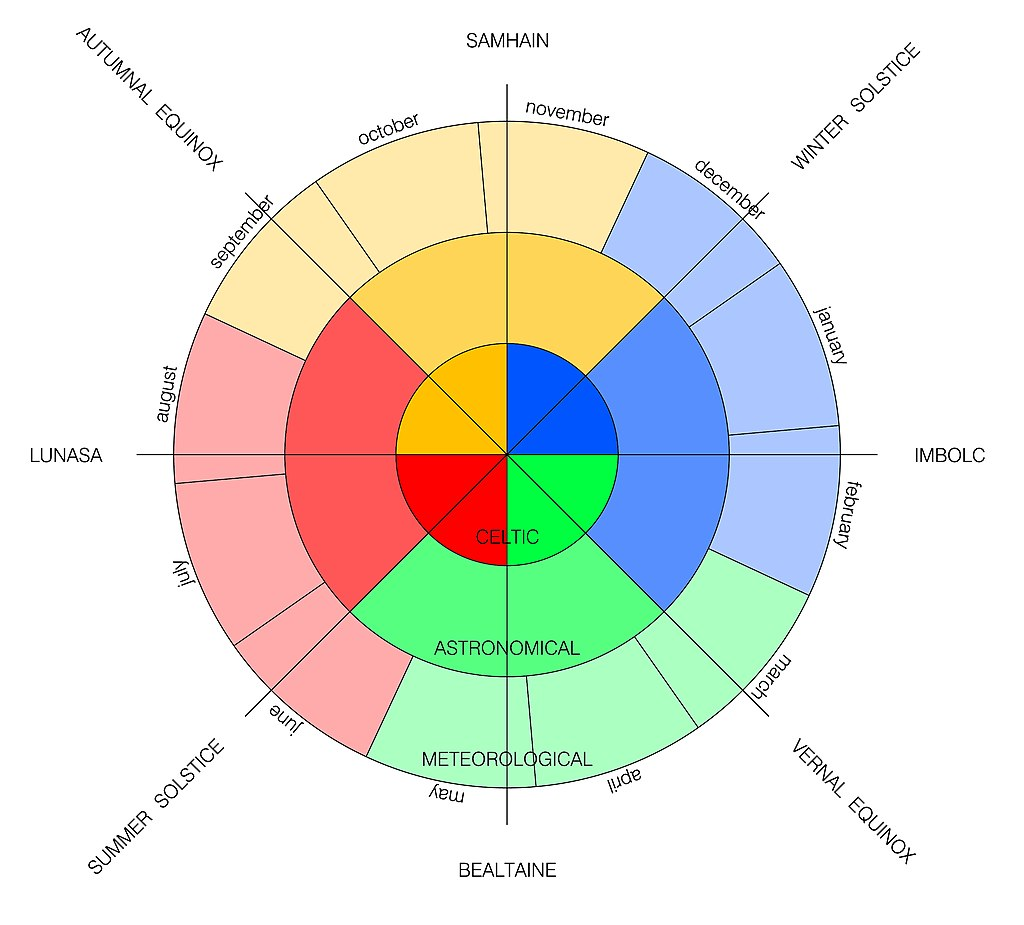

In [10]:
# Library Import
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.linear_model import LinearRegression

# Create Fresh DataFrame
irish_milk = pd.read_csv("files/merged.csv")

# Convert 'Month' to datetime
irish_milk['Month'] = pd.to_datetime(irish_milk['Month'], format='%Y-%m')

# Defining Spring and Summer months based on traditional Irish (Celtic) seasons
spring_months = [2, 3, 4] # February, March, April
summer_months = [5, 6, 7] # May, June, July

# Create subsets of data for spring and summer
spring_data = irish_milk[irish_milk['Month'].dt.month.isin(spring_months)]
summer_data = irish_milk[irish_milk['Month'].dt.month.isin(summer_months)]

>I will calculate the standard deviation for the spring_data and summer_data to show on a boxplot. I want to illustrate the average temperature and rainfall for the spring and summer months and then use this to synthesize future data further along in the project. I have used the [Matplotlib Documentation on subplots](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) and Dr Shouke Wei's guide published on [Medium.com](https://medium.com/@shouke.wei/3-convenient-methods-to-plot-a-horizontal-or-vertical-line-with-matplotlib-b8fbdf77f7a5) for how to plot horizontal lines with Matplotlib to guide how I have done this. 

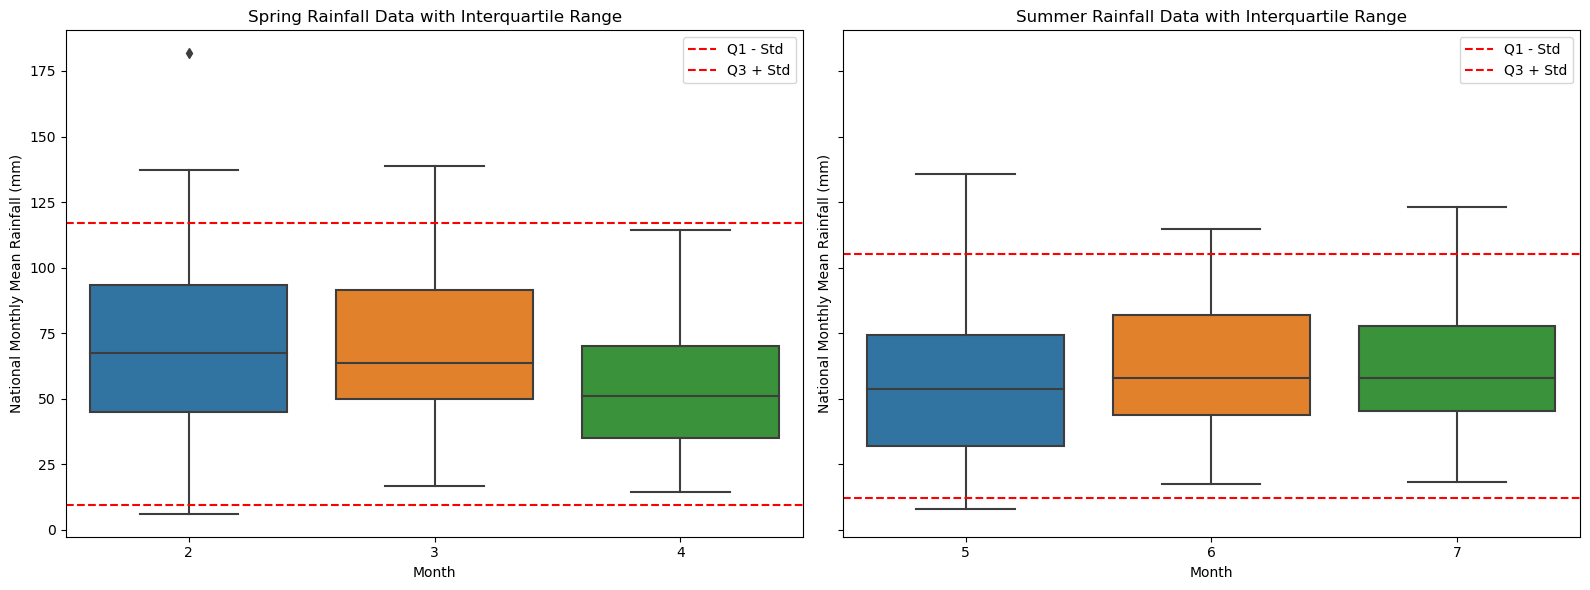

In [11]:
# Calculate standard deviation of rainfall for both subsets
std_springrain = spring_data['NationalMonthlyMeanRainfallMM'].std()
std_summerrain = summer_data['NationalMonthlyMeanRainfallMM'].std()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot spring data with interquartile range
sns.boxplot(x=spring_data['Month'].dt.month, y=spring_data['NationalMonthlyMeanRainfallMM'], ax=axes[0])
axes[0].set_title('Spring Rainfall Data with Interquartile Range')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('National Monthly Mean Rainfall (mm)')

# Adding standard deviation lines for interquartile range (for spring data)
axes[0].axhline(spring_data['NationalMonthlyMeanRainfallMM'].quantile(0.25) - std_springrain, linestyle='--', color='red', label='Q1 - Std')
axes[0].axhline(spring_data['NationalMonthlyMeanRainfallMM'].quantile(0.75) + std_springrain, linestyle='--', color='red', label='Q3 + Std')
axes[0].legend()

# Plot summer data with interquartile range
sns.boxplot(x=summer_data['Month'].dt.month, y=summer_data['NationalMonthlyMeanRainfallMM'], ax=axes[1])
axes[1].set_title('Summer Rainfall Data with Interquartile Range')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('National Monthly Mean Rainfall (mm)')

# Adding standard deviation lines for interquartile range (for summer data)
axes[1].axhline(summer_data['NationalMonthlyMeanRainfallMM'].quantile(0.25) - std_summerrain, linestyle='--', color='red', label='Q1 - Std')
axes[1].axhline(summer_data['NationalMonthlyMeanRainfallMM'].quantile(0.75) + std_summerrain, linestyle='--', color='red', label='Q3 + Std')
axes[1].legend()

plt.tight_layout()
plt.show()

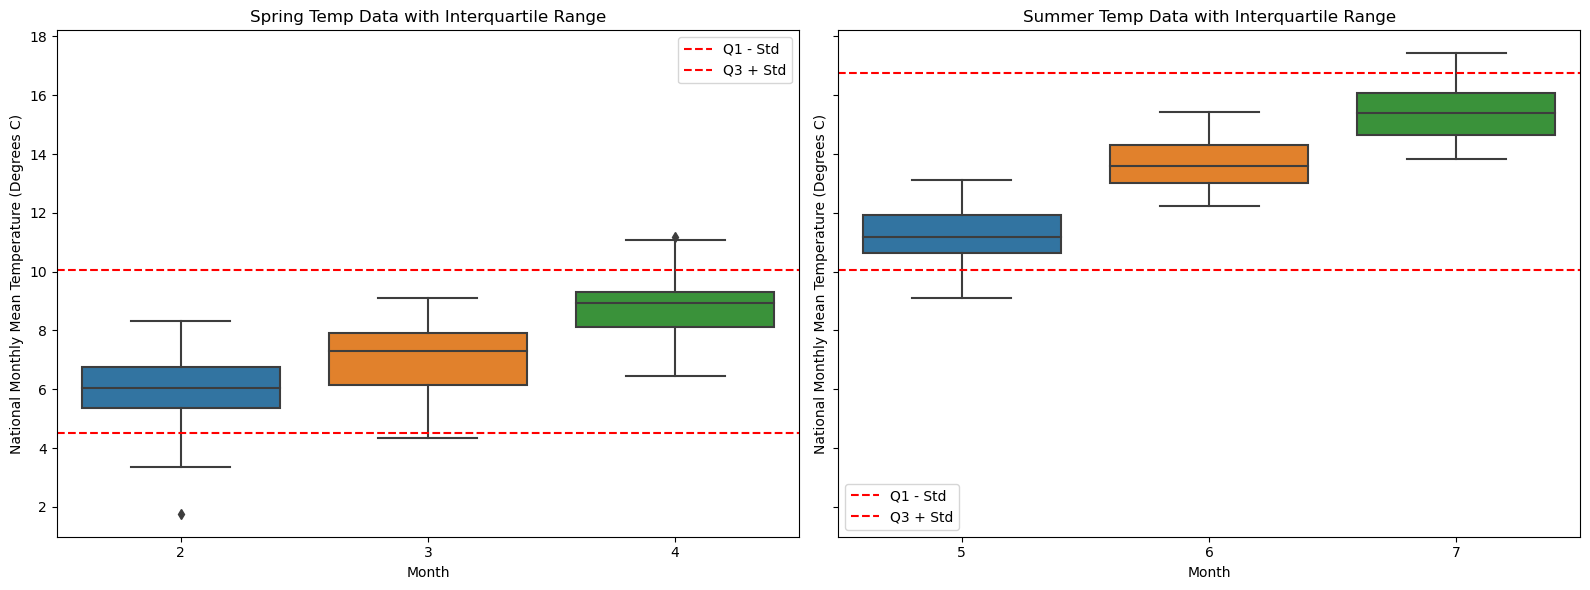

In [12]:
# Calculate standard deviation of temperature for both subsets
std_springtemp = spring_data['NationalMonthlyMeanTempDegreesC'].std()
std_summertemp = summer_data['NationalMonthlyMeanTempDegreesC'].std()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

# Plot spring data for temperature with interquartile range
sns.boxplot(x=spring_data['Month'].dt.month, y=spring_data['NationalMonthlyMeanTempDegreesC'], ax=axes[0])
axes[0].set_title('Spring Temp Data with Interquartile Range')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('National Monthly Mean Temperature (Degrees C)')

# Adding standard deviation lines for interquartile range (for spring data)
axes[0].axhline(spring_data['NationalMonthlyMeanTempDegreesC'].quantile(0.25) - std_springtemp, linestyle='--', color='red', label='Q1 - Std')
axes[0].axhline(spring_data['NationalMonthlyMeanTempDegreesC'].quantile(0.75) + std_springtemp, linestyle='--', color='red', label='Q3 + Std')
axes[0].legend()

# Plot summer data for temperature with interquartile range
sns.boxplot(x=summer_data['Month'].dt.month, y=summer_data['NationalMonthlyMeanTempDegreesC'], ax=axes[1])
axes[1].set_title('Summer Temp Data with Interquartile Range') 
axes[1].set_xlabel('Month')
axes[1].set_ylabel('National Monthly Mean Temperature (Degrees C)')

# Adding standard deviation lines for interquartile range (for summer data)
axes[1].axhline(summer_data['NationalMonthlyMeanTempDegreesC'].quantile(0.25) - std_summertemp, linestyle='--', color='red', label='Q1 - Std')
axes[1].axhline(summer_data['NationalMonthlyMeanTempDegreesC'].quantile(0.75) + std_summertemp, linestyle='--', color='red', label='Q3 + Std')
axes[1].legend()

plt.tight_layout()
plt.show()

***
### Next Steps:
I want to break up the data into decades. I will go with the time period 1980-89, 1990-99, 2000-09, 2010-19, 2020-Present. The intention is for the synthesis of future data to illustrate accurately the 2020-2029 period and 2030-2039. I do not yet know what this will look like but if the averages are increasing through the decades then I will try to accurately model into the future and add in climate change modelling into the mix. 

##### Breaking The Data Up Into Decades

In [13]:
# Extract the year from the 'Month' column
irish_milk['Year'] = irish_milk['Month'].dt.year

# Define the decades
decades = [1980, 1990, 2000, 2010, 2020]

# Create a new column indicating the decade for each row
irish_milk['Decade'] = pd.cut(irish_milk['Year'], bins=[1980, 1990, 2000, 2010, 2020, pd.to_datetime('now', utc=True).year], labels=decades, right=False)

# Define Spring and Summer months based on traditional Irish (Celtic) seasons
spring_months = [2, 3, 4]  # February, March, April
summer_months = [5, 6, 7]  # May, June, July

# Create subsets of data for spring and summer within each decade
# Create dictionaries to store the subsets
avg_temp_dict = {}
avg_rainfall_dict = {}
avg_protein_dict = {}
avg_fat_dict = {}

# Loop through the decades
for decade in decades:
    # Loop through the tuples associating the name of the season with the corresponding integer representing the month
    for season, season_months in [('Spring', spring_months), ('Summer', summer_months)]:
         # Loop through the months
        for month in season_months:
            # Creates subset of data based on the decade, season, and month being iterated through
            subset = irish_milk[(irish_milk['Decade'] == decade) & (irish_milk['Month'].dt.month == month)]
            
            # Calculate averages for temperature, rainfall, protein content, and fat content
            avg_temp = subset['NationalMonthlyMeanTempDegreesC'].mean()
            avg_rainfall = subset['NationalMonthlyMeanRainfallMM'].mean()
            avg_protein = subset['ProteinContentPercent'].mean()
            avg_fat = subset['FatContentPercent'].mean()
            
            # Store the averages in the dictionaries
            avg_temp_dict[f'{decade}_{season}_{month}_avg_temp'] = avg_temp
            avg_rainfall_dict[f'{decade}_{season}_{month}_avg_rainfall'] = avg_rainfall
            avg_protein_dict[f'{decade}_{season}_{month}_avg_protein'] = avg_protein
            avg_fat_dict[f'{decade}_{season}_{month}_avg_fat'] = avg_fat

From the above, I now have dictionaries with the average spring values and average summer values for each of the four variables - *FatContent%*, *ProteinContent*, *NationalMonthlyMeanRainfallMM* and *NationalMonthlyMeanTempDegreesC*. The keys of these dictionaries would be like '1980s_Spring_2_avg_temp', '1980s_Spring_3_avg_temp', etc., to access the average temperature for each month within each decade and season.

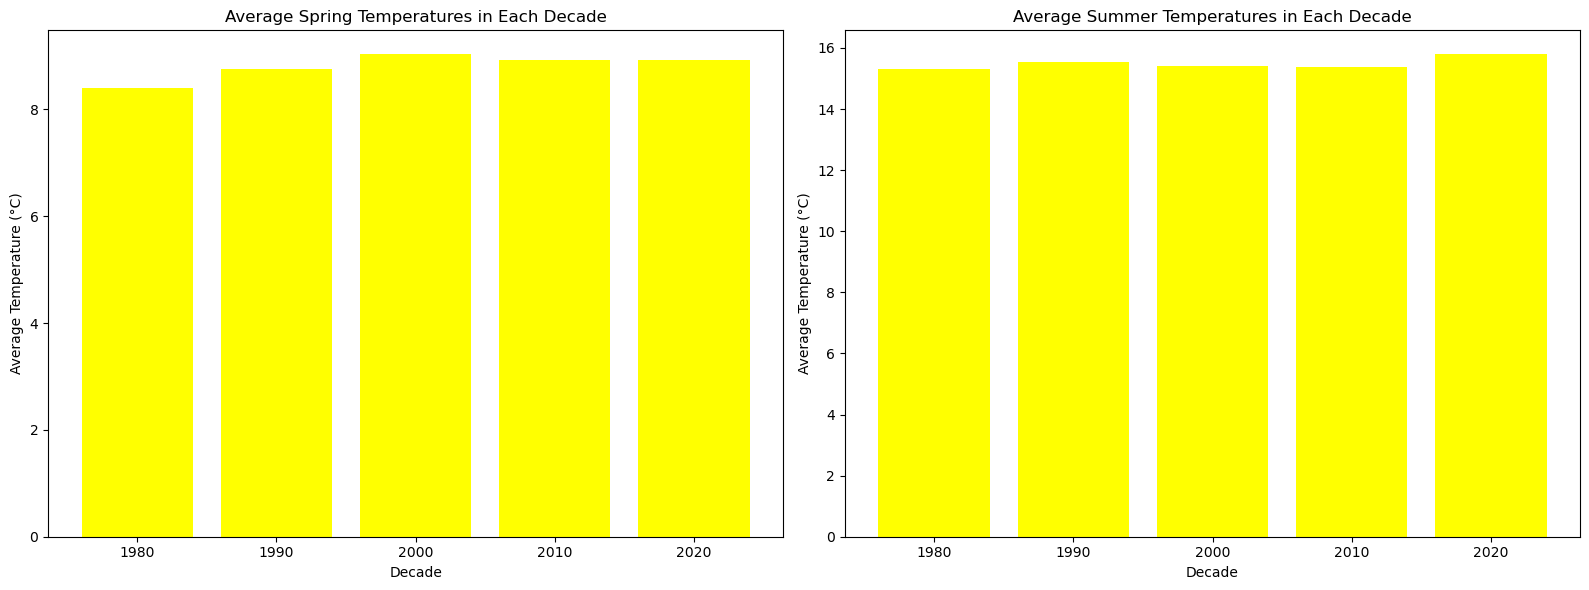

In [22]:
# Library Imports
import matplotlib.pyplot as plt
import numpy as np

# Extract decades and average temperatures from avg_temp_dict
decades_spring_temp = []
avg_temps_spring = []

decades_summer_temp = []
avg_temps_summer = []

# Loop through the items in avg_temp_dict
for key, value in avg_temp_dict.items():
    # Filter only Spring and Summer averages
    if 'Spring' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades list for use on x-axis
        decades_spring_temp.append(decade)
        avg_temps_spring.append(value)
    elif 'Summer' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades list for use on x-axis
        decades_summer_temp.append(decade)
        avg_temps_summer.append(value)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Spring Temperatures
axes[0].bar(decades_spring_temp, avg_temps_spring, color='yellow')
axes[0].set_title('Average Spring Temperatures in Each Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Temperature (°C)')

# Plotting Summer Temperatures
axes[1].bar(decades_summer_temp, avg_temps_summer, color='yellow')
axes[1].set_title('Average Summer Temperatures in Each Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Temperature (°C)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

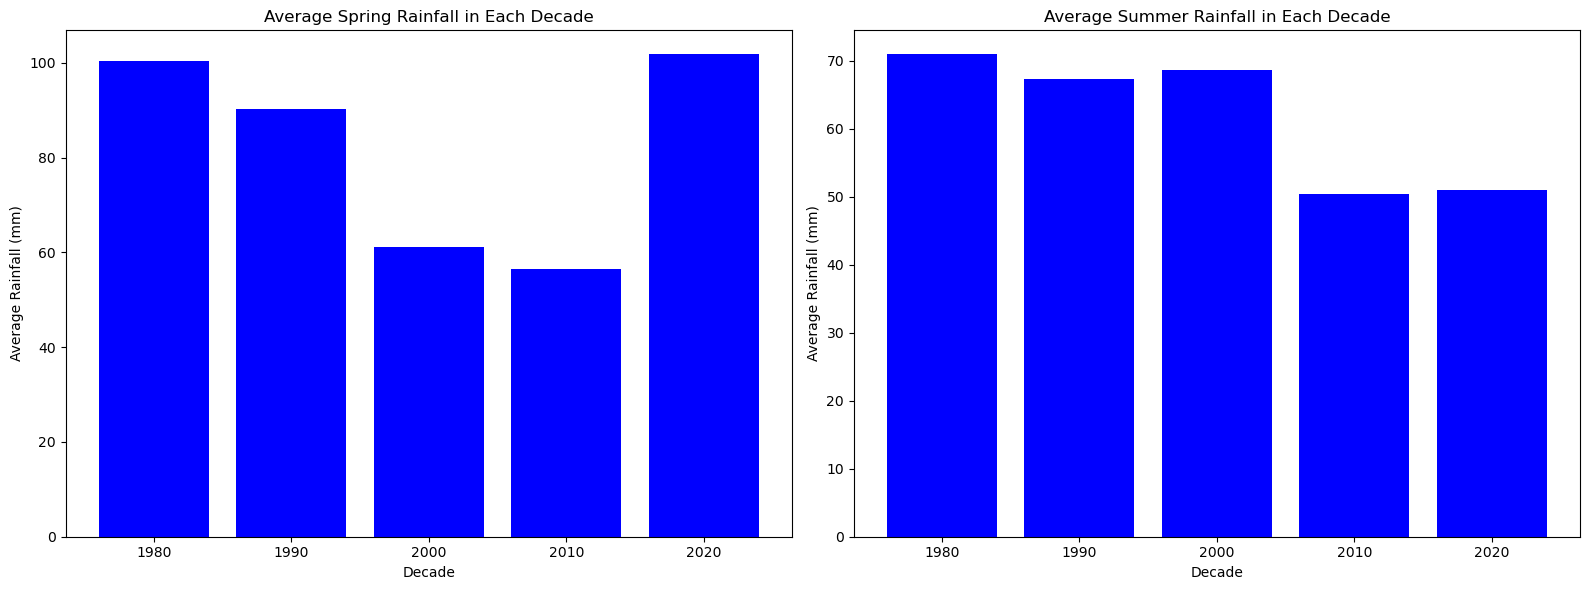

In [23]:
# Extract decades and average temperatures from avg_rainfall_dict
decades_spring_rain = []
avg_rain_spring = []

decades_summer_rain = []
avg_rain_summer = []

# Loop through the items in avg_rainfall_dict
for key, value in avg_rainfall_dict.items():
    # Filter only Spring and Summer averages
    if 'Spring' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades_spring_rain list for use on x-axis
        decades_spring_rain.append(decade)
        avg_rain_spring.append(value)
    elif 'Summer' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades_summer_rain list for use on x-axis
        decades_summer_rain.append(decade)
        avg_rain_summer.append(value)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Spring Rainfall
axes[0].bar(decades_spring_rain, avg_rain_spring, color='blue')
axes[0].set_title('Average Spring Rainfall in Each Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Rainfall (mm)')

# Plotting Summer Rainfall
axes[1].bar(decades_summer_rain, avg_rain_summer, color='blue')
axes[1].set_title('Average Summer Rainfall in Each Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Rainfall (mm)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()



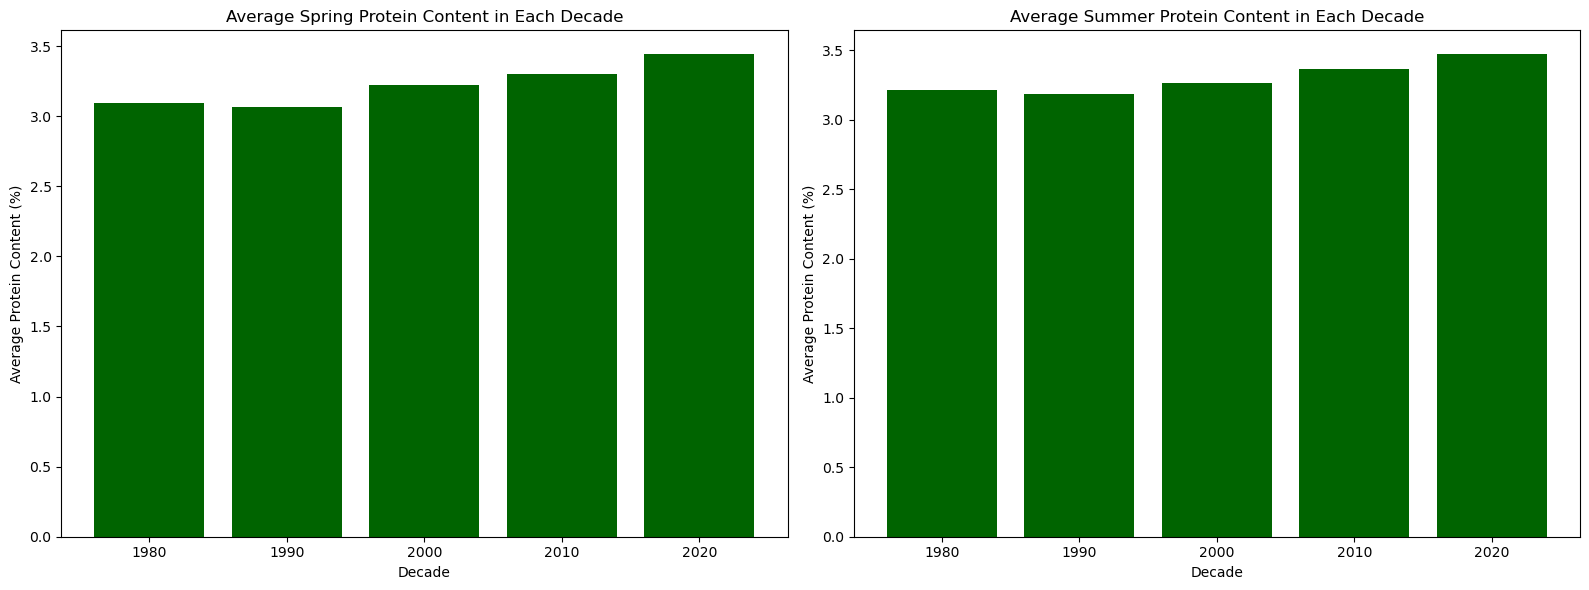

In [24]:
# Extract decades and average protein content from avg_protein_dict
decades_spring_protein = []
avg_protein_spring = []

decades_summer_protein = []
avg_protein_summer = []

# Loop through the items in avg_protein_dict
for key, value in avg_protein_dict.items():
    # Filter only Spring and Summer averages
    if 'Spring' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades_spring_protein list for use on x-axis
        decades_spring_protein.append(decade)
        avg_protein_spring.append(value)
    elif 'Summer' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades_summer_protein list for use on x-axis
        decades_summer_protein.append(decade)
        avg_protein_summer.append(value)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Spring Protein Content
axes[0].bar(decades_spring_protein, avg_protein_spring, color='darkgreen')
axes[0].set_title('Average Spring Protein Content in Each Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Protein Content (%)')

# Plotting Summer Protein Content
axes[1].bar(decades_summer_protein, avg_protein_summer, color='darkgreen')
axes[1].set_title('Average Summer Protein Content in Each Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Protein Content (%)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

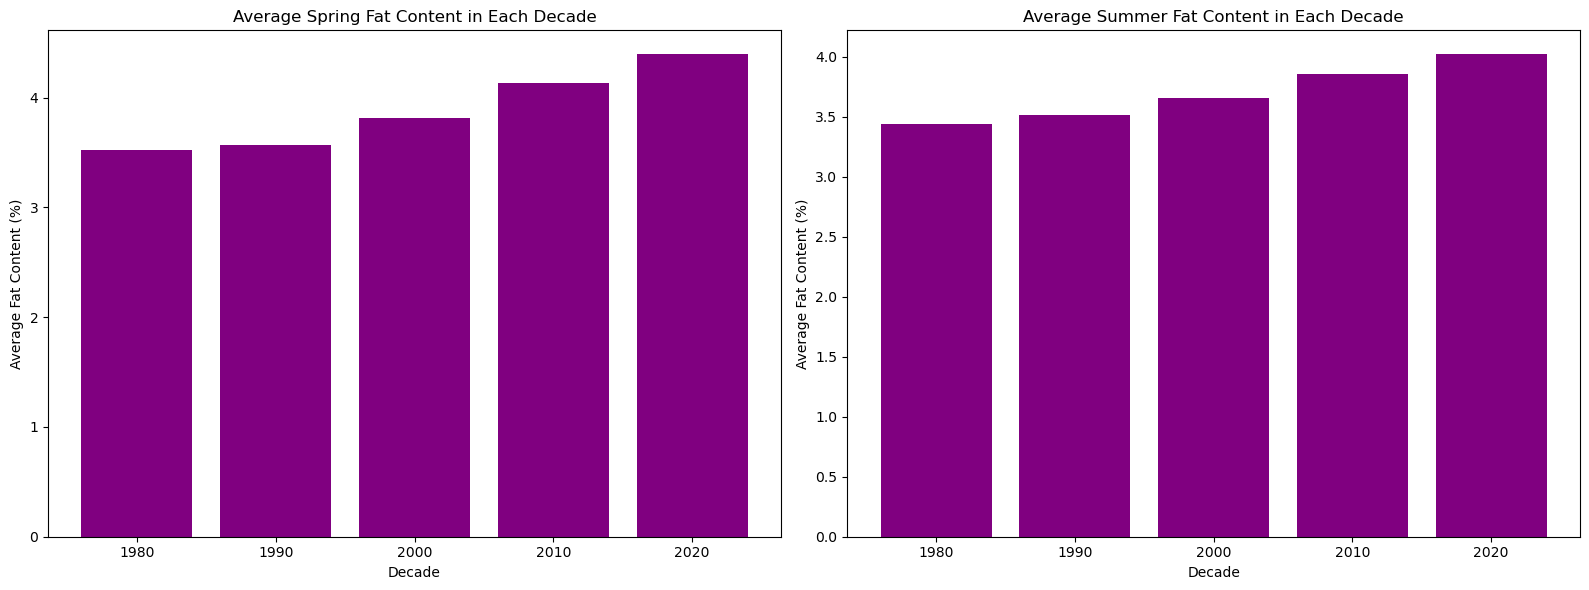

In [25]:
# Extract decades and average fat content from avg_fat_dict
decades_spring_fat = []
avg_fat_spring = []

decades_summer_fat = []
avg_fat_summer = []

# Loop through the items in avg_fat_dict
for key, value in avg_fat_dict.items():
    # Filter only Spring and Summer averages
    if 'Spring' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades_spring_fat list for use on x-axis
        decades_spring_fat.append(decade)
        avg_fat_spring.append(value)
    elif 'Summer' in key:
        # Take value before '_' for decade value
        decade = key.split('_')[0]
        # Append extracted decade value to decades_summer_fat list for use on x-axis
        decades_summer_fat.append(decade)
        avg_fat_summer.append(value)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Spring Fat Content
axes[0].bar(decades_spring_fat, avg_fat_spring, color='purple')
axes[0].set_title('Average Spring Fat Content in Each Decade')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Average Fat Content (%)')

# Plotting Summer Fat Content
axes[1].bar(decades_summer_fat, avg_fat_summer, color='purple')
axes[1].set_title('Average Summer Fat Content in Each Decade')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Fat Content (%)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

***
### Plotting

> [Seaborn Lineplot Documentation](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

***
### END